# Intro

It's the last time we meet in class for exercises! And to celebrate this mile-stone, I've put together an very nice little set of exercises. And if you're behind, don't worry. The workload is low!

  - Part A: First, we play around with sentiment analysis
  - That's it!


# Part A: Sentiment analysis

Sentiment analysis is another highly useful technique which we'll use to make sense of the Wiki
data. Further, experience shows that it might well be very useful when you get to the project stage of the class.



> **Video Lecture**: Uncle Sune talks about sentiment and his own youthful adventures.



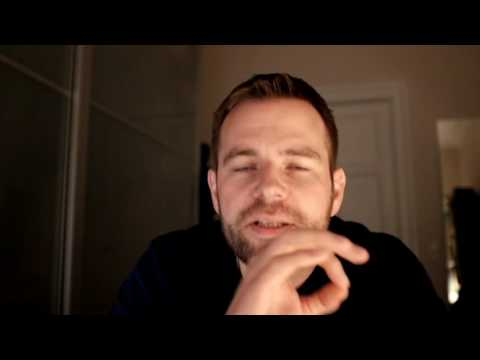

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("JuYcaYYlfrI",width=800, height=450)

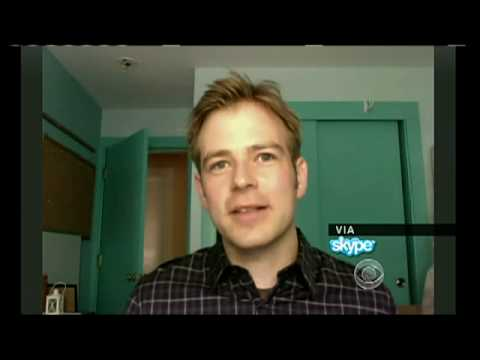

In [2]:
# There's also this one from 2010
YouTubeVideo("hY0UCD5UiiY",width=800, height=450)

> Reading: [Temporal Patterns of Happiness and Information in a Global Social Network: Hedonometrics and Twitter](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0026752) 


*Exercise*: Sentiment distribution. 
> 
> * Download the LabMT wordlist. It's available as supplementary material from [Temporal Patterns of Happiness and Information in a Global Social Network: Hedonometrics and Twitter](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0026752) (Data Set S1). Describe briefly how the list was generated.
> * Based on the LabMT word list, write a function that calculates sentiment given a list of tokens (the tokens should be lower case, etc).
> * Iterage over the nodes in your network, tokenize each page, and calculate sentiment every single page. Now you have sentiment as a new nodal property.
> * Calculate the average sentiment across all the pages. Also calculate the median, variance, 25th percentile, 75th percentile.
> * Remember histograms? Create a histogram of all of the artists's associated page-sentiments. (And make it a nice histogram - use your histogram making skills from Week 2). Add the mean, meadian, ect from above to your plot.
> * Who are the 10 artists with happiest and saddest pages?

<div class="alert alert-block alert-info">
As long as you get the plots right, it's OK to use LLM help here.
</div>

*Exercise*: Community sentiment distribution. 
  
> * Last week we calculated the stuctural communities of the graph. For this exercise, we use those communities (just the 10 largest ones). Specifically, you should calculate the average the average sentiment of the nodes in each community to find a *community level sentiment*. 
>   - Name each community by its three most connected characters. 
>   - What are the three happiest communities? 
>   - what are the three saddest communities?
>   - Do these results confirm what you can learn about each community by comparing to the genres, checking out the word-clouds for each community, and reading the wiki-pages? 
> * Compare the sentiment of the happiest and saddest communities to the overall (entire network) distribution of sentiment that you calculated in the previous exercise. Are the communities very differenct from the average? Or do you find the sentiment to be quite similar across all of the communities?

<div class="alert alert-block alert-info">
As above, feel free to go nuts with help from an LLM with this exercise for the technical parts. But try to answer the questions about interpreting the results with your own human brain.
</div>

**Note**: Calculating sentiment takes a long time, so arm yourself with patience as your code runs (remember to check that it runs correctly, before waiting patiently). Further, these tips may speed things up. And save somewhere, so you don't have to start over.

**Tips for speed**
* If you use `freqDist` prior to finding the sentiment, you only have to find it for every unique word and hereafter you can do a weighted mean.
* More tips for speeding up loops https://wiki.python.org/moin/PythonSpeed/PerformanceTips#Loops

In [107]:
import networkx as nx
import pandas as pd
import pickle as pkl
from nltk import word_tokenize
from string import punctuation
from functools import reduce
import numpy as np
import matplotlib.pyplot as plt
"""
*Exercise*: Sentiment distribution. 
> 
> * Based on the LabMT word list, write a function that calculates sentiment given a list of tokens (the tokens should be lower case, etc).
> * Iterage over the nodes in your network, tokenize each page, and calculate sentiment every single page. Now you have sentiment as a new nodal property.
> * Calculate the average sentiment across all the pages. Also calculate the median, variance, 25th percentile, 75th percentile.
> * Remember histograms? Create a histogram of all of the artists's associated page-sentiments. (And make it a nice histogram - use your histogram making skills from Week 2). Add the mean, meadian, ect from above to your plot.
> * Who are the 10 artists with happiest and saddest pages?
"""
wordlist = pd.read_csv('Week_8_Resources/word_list_sentiment.txt', sep="\t",header = 0)
wordlist['twitter_rank'] = pd.to_numeric(wordlist['twitter_rank'], errors='coerce')
wordlist['google_rank'] = pd.to_numeric(wordlist['google_rank'], errors='coerce')
wordlist['nyt_rank'] = pd.to_numeric(wordlist['nyt_rank'], errors='coerce')
wordlist['lyrics_rank'] = pd.to_numeric(wordlist['lyrics_rank'], errors='coerce')
wordlist['happiness_rank'] = pd.to_numeric(wordlist['happiness_rank'], errors='coerce')
wordlist['happiness_average'] = pd.to_numeric(wordlist['happiness_average'], errors='coerce')
wordlist['happiness_standard_deviation'] = pd.to_numeric(wordlist['happiness_standard_deviation'], errors='coerce')



## Function to calculate sentiment
def sentiment(ls, wordlist):
    word_to_happiness = dict(zip(wordlist['word'].str.lower(), wordlist['happiness_average']))
    sentiment = 0
    total_words=0
    for word in ls:
        word = word.lower()
        if word in word_to_happiness:
            sentiment += word_to_happiness[word]
            total_words+=1
    return sentiment/total_words

## Load the graph
with open("Week_7_Resources\graph_with_attributes.pkl", "rb") as f:
    G = pkl.load(f)
    G = G.to_undirected()

punc_ls = list(punctuation)
punc_ls.append("''")
punc_ls.append("``")
punc_ls.append("''")
punc_ls.append("—")
punc_ls.append("|-")

##tokenize each page 
nodes_done =0
for node in G.nodes():
    content = (G.nodes[node]["Content"]).lower()
    content = reduce((lambda x, y: x.replace(y, " ")), punc_ls, content)
    G.nodes[node]["Tokens"] = word_tokenize(content)
## Calculate sentiment for each page
nodes_done =0

for node in G.nodes():
    G.nodes[node]["Sentiment"] = sentiment(G.nodes[node]["Tokens"], wordlist)
    print("Sentiment progress: ", nodes_done/len(G.nodes()), end="\r")
    
sentiments = [G.nodes[node]["Sentiment"] for node in G.nodes()]
mean = sum(sentiments)/len(sentiments)
median = sorted(sentiments)[len(sentiments)//2]



<>:42: SyntaxWarning: invalid escape sequence '\g'
<>:42: SyntaxWarning: invalid escape sequence '\g'
C:\Users\musti\AppData\Local\Temp\ipykernel_16980\4205318021.py:42: SyntaxWarning: invalid escape sequence '\g'
  with open("Week_7_Resources\graph_with_attributes.pkl", "rb") as f:


Mean sentiment:  5.685329034136576 Median sentiment:  5.686389676687381
Happiest artists:  ['McAlister Kemp', 'Troy Cassar-Daley', 'Donny Parenteau', 'Spirit Family Reunion', 'Aleyce Simmonds', 'John Carter Cash', 'Lanco (band)', 'Mallary Hope', 'The Wolfe Brothers', 'Graeme Connors']
Sadist artists:  ['Those Poor Bastards', 'David _Stringbean_ Akeman', 'Bill Phillips (singer)', 'Cliff Carlisle', 'Bill Haley & His Comets', 'Roger Alan Wade', 'Spade Cooley', 'The Big Bopper', 'Johnny Paycheck', 'Little Jimmy Dickens']


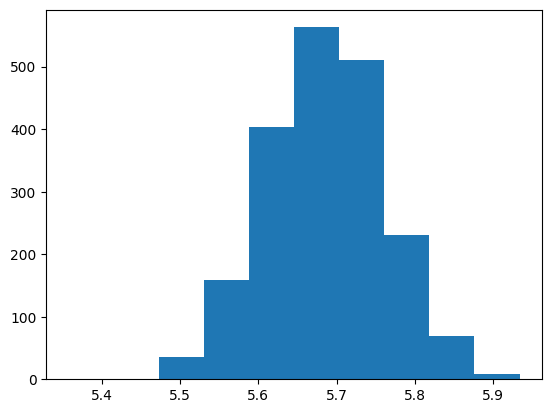

In [108]:
print("Mean sentiment: ", mean, "Median sentiment: ", median)
his,bins = np.histogram(sentiments)
plt.hist(sentiments, bins)

happiest_artists = sorted(G.nodes(data=True), key=lambda x: x[1]["Sentiment"], reverse=True)[:10]
happiest_artists = [art[0] for art in happiest_artists]
Sadist_artists = sorted(G.nodes(data=True), key=lambda x: x[1]["Sentiment"], reverse=False)[:10]
Sadist_artists = [art[0] for art in Sadist_artists]
print("Happiest artists: ", happiest_artists)
print("Sadist artists: ", Sadist_artists)


In [106]:
"""
*Exercise*: Community sentiment distribution. 
  
> * Last week we calculated the stuctural communities of the graph. For this exercise, we use those communities (just the 10 largest ones). Specifically, you should calculate the average the average sentiment of the nodes in each community to find a *community level sentiment*. 
>   - Name each community by its three most connected characters. 
>   - What are the three happiest communities? 
>   - what are the three saddest communities?
>   - Do these results confirm what you can learn about each community by comparing to the genres, checking out the word-clouds for each community, and reading the wiki-pages? 
> * Compare the sentiment of the happiest and saddest communities to the overall (entire network) distribution of sentiment that you calculated in the previous exercise. Are the communities very differenct from the average? Or do you find the sentiment to be quite similar across all of the communities?
"""

from community import community_louvain
partition = community_louvain.best_partition(G)
value_to_keys = {}
for key, value in partition.items():
    if value not in value_to_keys:
        value_to_keys[value] = []
    value_to_keys[value].append(key)
biggest_communities = sorted(value_to_keys.items(), key=lambda x: len(x[1]), reverse=True)[:10]
community_sentiments = {}
for community in biggest_communities:
    sentiment = 0
    for node in community[1]:
        sentiment+=G.nodes[node]["Sentiment"]
    community_sentiments[community[0]] = sentiment/len(community[1])
print("Community sentiments: ", community_sentiments)


Community sentiments:  {3: 5.641709574441094, 1: 5.722528439437901, 0: 5.688492468171708, 8: 5.679465508599323, 4: 5.686725931721462, 12: 5.6923018570158925, 7: 5.779715012522674, 10: 5.701999103851487, 14: 5.7243281149444485, 9: 5.742446866954223}


In [2]:
from nltk.corpus import sentiwordnet as swn
print(list(swn.senti_synsets('happy')))

[SentiSynset('happy.a.01'), SentiSynset('felicitous.s.02'), SentiSynset('glad.s.02'), SentiSynset('happy.s.04')]
